# Задача:
    Рассмотреть несколько библиотек для работы с изображениями и сравнить их.
    
# Цели:
    Изучит основные операции изменения изображений:
        - изменение размера изображения
        - вращение изображения
        - отразить изображение
    Изучить библиотеки для обработки изображений.
    Провести сравнительный анализ работы библиотек.
# План:
    1.	Рассмотреть библиотеки для обработки изображений, особенности их инициализации и работы.
    2.	Анализ времени работы библиотек при обработке изображений.
    3.	Вывод 



  ## 1.	Библиотеки для обработки изображений.

### - OpenCV
Для установки необходимо ввести команду pip install opencv-python


In [1]:
import cv2 as cv

# импортируем matplotlib для отобрадения изображения в тетради, т.к.
# при использовании стандартной функции imshow, изображение выводится в отдельном окне

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os.path import join
path = u'./boats/inflatable boat/'

(-0.5, 1279.5, 840.5, -0.5)

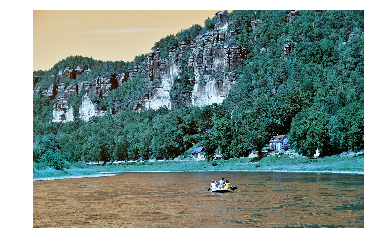

In [2]:
cv_img = cv.imread(path+'/kurort-rathen-saxon-switzerland-3529658.jpg') 
# при передаче изображения в matplotlib, оно передается как numpy.array
plt.imshow(cv_img, interpolation='none')
plt.axis('off')

При выводе изображднения видно, что цвета не соответствуют оригиналу. 

Это обусловленно тем, что opencv читает и пишет изображения в формате BGR.

Для корректного отображения в matplotlib, преобразуем изображение в RGB.

(-0.5, 1279.5, 840.5, -0.5)

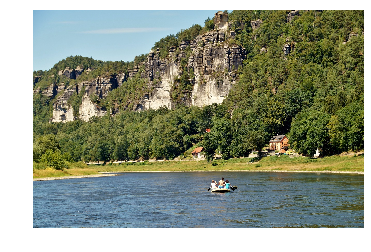

In [3]:
cv_img = cv.cvtColor(cv_img, cv.COLOR_BGR2RGB)
plt.imshow(cv_img, interpolation='none')
plt.axis('off')

In [4]:
# размеры изображения (высота, ширина, количество цветов в пикселе)
cv_img.shape

(841, 1280, 3)

### - Pillow
Для установки необходимо ввести команду pip install Pillow

JPEG (1280, 841) RGB


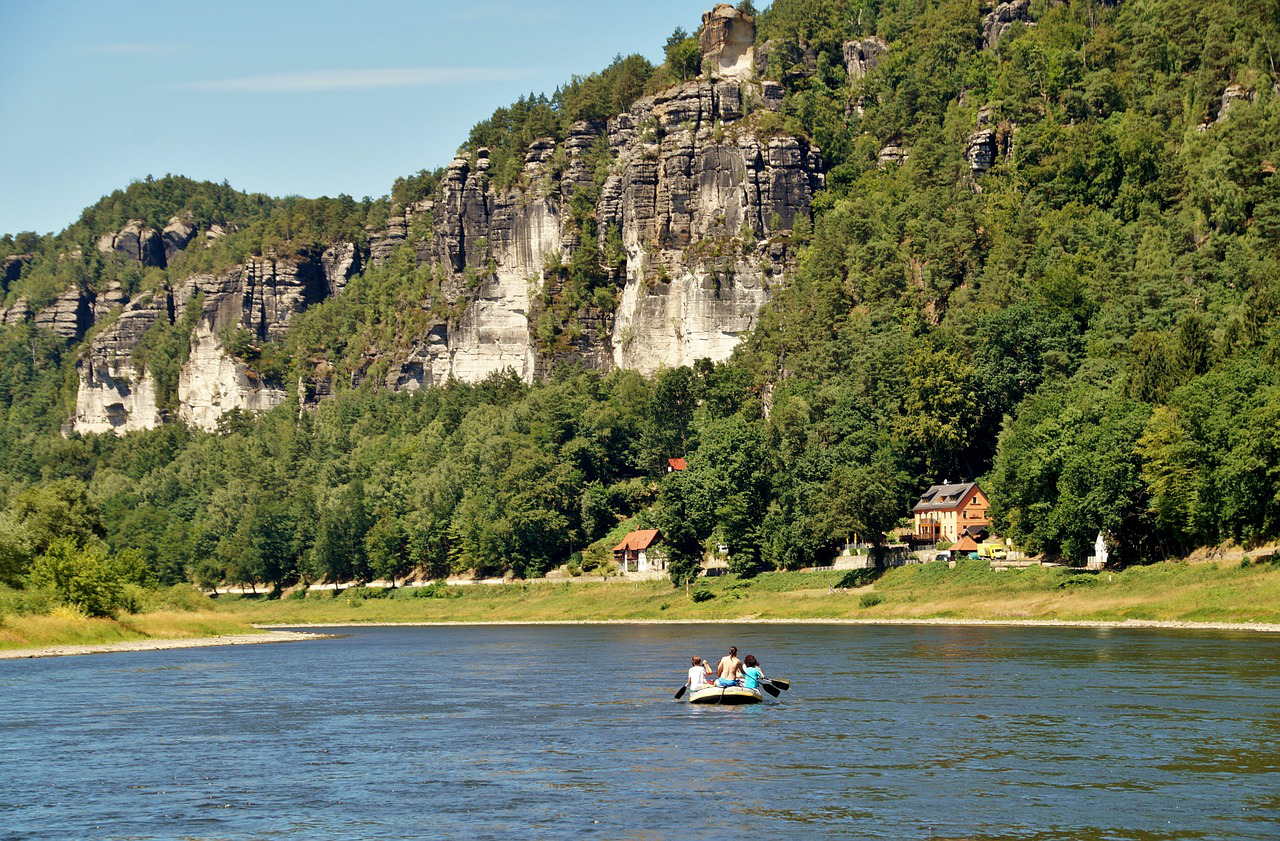

In [5]:
from PIL import Image, ImageOps

pil_img = Image.open(path+'/kurort-rathen-saxon-switzerland-3529658.jpg')
# формат, размеры (высота, ширина), цветовая схема изображения
print(pil_img.format, pil_img.size,pil_img.mode)
pil_img

### - scikit-image
Для установки необходимо ввести команду pip install scikit-image

(-0.5, 1279.5, 840.5, -0.5)

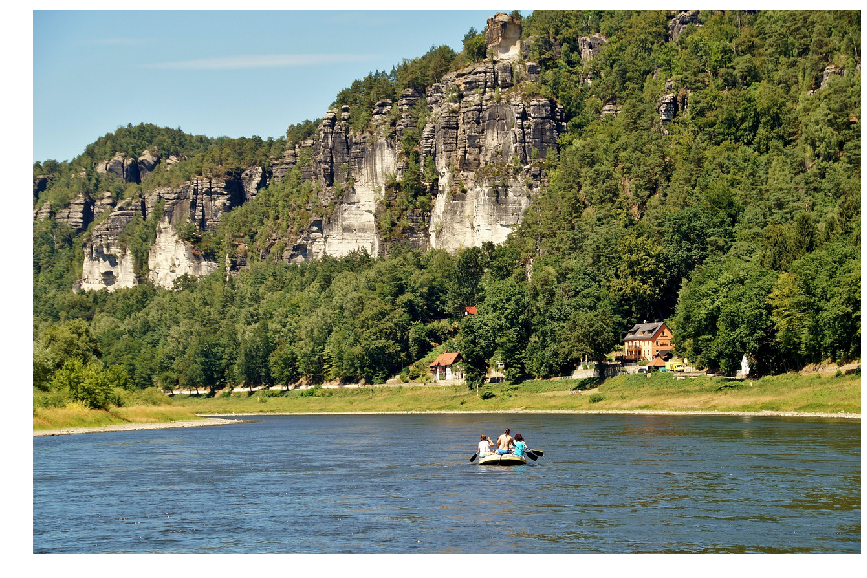

In [6]:
from skimage import transform, io, filters
import numpy as np

sk_img = io.imread(path+'/kurort-rathen-saxon-switzerland-3529658.jpg')

plt.figure(figsize=(20,10))
plt.imshow(sk_img, interpolation='none')
plt.axis('off')

In [7]:
# размеры изображения (высота, ширина, количество цветов в пикселе)
sk_img.shape

(841, 1280, 3)

### 2.	Анализ работы библиотек при обработке изображений:

#### Алгоритм проверки
 1. чтение изображения
 2. размытие изобрадения
 3. отражение слева-направо
 4. отражение сверху вниз
 5. сжимаем изображение к указанному размеру (500,500)
 6. вращаем изображение на 35'
 7. сохранение в файл

In [8]:
from time import time
import pandas as pd

In [9]:
# функция для проверки библиотеки  Pillow
def work_pil(path):
    # 1.
    time_start = time()
    img_pil = Image.open(path)
    time_1 = time()
    # 2.
    img_pil = ImageOps.box_blur(img_pil, radius=2)
    time_2 = time()
    # 3.
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    time_3 = time()
    # 4.
    img_pil = img_pil.transpose(Image.FLIP_TOP_BOTTOM)
    time_4 = time()
    # 5.
    img_pil = img_pil.resize((500,500), Image.BOX)
    time_5 = time()
    # 6.
    img_pil = img_pil.rotate(35)
    time_6 = time()
    # 7.
    img_pil.save(path[-4]+'_pil.jpg')
    time_7 = time()
    return [time_1-time_start,time_2-time_1,time_3-time_2,time_4-time_3,time_5-time_4,time_6-time_5, time_7-time_6]

In [10]:
# функция для проверки библиотеки  opencv
def work_cv(path):
    # 1.
    time_start = time()
    img_cv = cv.imread(path)
    img_cv = cv.cvtColor(img_cv, cv.COLOR_BGR2RGB)
    time_1 = time()
    # 2. 
    img_cv = cv.blur(img_cv, ksize=(5, 5))
    time_2 = time()
    # 3. 
    img_cv = cv.flip(img_cv, flipCode=1)
    time_3 = time()
    # 4. 
    img_cv = cv.flip(img_cv, flipCode=0) 
    time_4 = time()
    # 5.
    img_cv = cv.resize(img_cv,(500, 500), interpolation = cv. INTER_NEAREST)
    time_5 = time()
    # 6.
    # создаем точку вращения
    rot = cv.getRotationMatrix2D((img_cv.shape[1]/2,img_cv.shape[0]/2),35,1) 
    img_cv = cv.warpAffine(img_cv,rot,(img_cv.shape[1],img_cv.shape[0]))
    time_6 = time()
    # 7.
    cv.imwrite(path[-4]+'_cv.jpg', img_cv)
    time_7 = time()
    return [time_1-time_start,time_2-time_1,time_3-time_2,time_4-time_3,time_5-time_4,time_6-time_5, time_7-time_6]

In [11]:
# функция для проверки библиотеки  scikit-image
def work_sk(path):
    # 1.
    time_start = time()
    img_sk = io.imread(path)
    time_1 = time()
    # 2. 
    img_sk = filters.gaussian(img_sk)
    time_2 = time()
    # 3. 
    img_sk = np.fliplr(img_sk) # метода  отражения не нашел, взял у numpy
    time_3 = time()
    # 4. 
    img_sk = np.flipud(img_sk) 
    time_4 = time()
    # 5.
    img_sk = transform.resize(img_sk, (500, 500))
    time_5 = time()
    # 6.
    # создаем точку вращения
    img_sk = transform.rotate(img_sk, 35, resize=False)
    time_6 = time()
    # 7.
    io.imsave(path[-4]+'_sk.jpg', img_sk)
    time_7 = time()
    return [time_1-time_start,time_2-time_1,time_3-time_2,time_4-time_3,time_5-time_4,time_6-time_5, time_7-time_6]

In [12]:
# создадим список файлов для проверки
files =list(filter( lambda x: x.endswith('.jpg'),  os.listdir(path)))

In [13]:
%%timeit
#замер выполнения функции opencv
for img in files:
    work_cv(path+img)

612 ms ± 5.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit
#замер выполнения функции Pillow
for img in files:
    work_pil(path+img)

970 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
#замер выполнения функции scikit-image
for img in files:
    work_sk(path+img)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\filters\_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


4.84 s ± 30.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
# сделаем еще замеры и потроим графики
df_cv = pd.DataFrame(columns=['чтение','размытие','отражение ЛП','отражение ВН','сжатие','вращение','сохранение'])
df_pil = pd.DataFrame(columns=['чтение','размытие','отражение ЛП','отражение ВН','сжатие','вращение','сохранение'])
df_sk = pd.DataFrame(columns=['чтение','размытие','отражение ЛП','отражение ВН','сжатие','вращение','сохранение'])
for img in files:
    df_cv.loc[img] = work_cv(path+img)
    df_pil.loc[img] = work_pil(path+img)
    df_sk.loc[img] = work_sk(path+img)


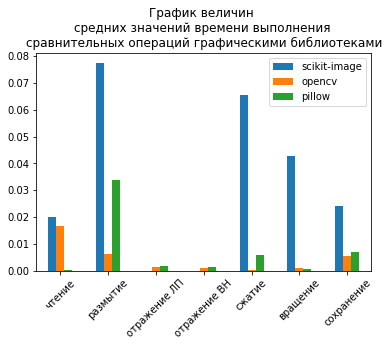

In [17]:
 pd.concat([df_sk.describe().loc['mean'], df_cv.describe().loc['mean'],
            df_pil.describe().loc['mean']],
           axis=1, keys=['scikit-image', 'opencv', 'pillow']).plot(kind='bar', legend=1, rot=45, title='График величин \nсредних значений времени выполнения \nсравнительных операций графическими библиотеками')